In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s3_traindata_bucket = "s3://ml-project-demo-zakaria/training_data/college_student_placement_dataset.csv"

In [3]:
raw_data = pd.read_csv(s3_traindata_bucket)
raw_data.drop('College_ID', axis=1, inplace=True)

In [4]:
raw_data['Internship_Experience'] = raw_data['Internship_Experience'].map({'No':0, 'Yes':1})

In [5]:
raw_data.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,No
1,97,5.52,5.37,8,0,7,8,0,No
2,109,5.36,5.83,9,0,3,1,1,No
3,122,5.47,5.75,6,1,1,6,1,No
4,96,7.91,7.69,7,0,8,10,2,No


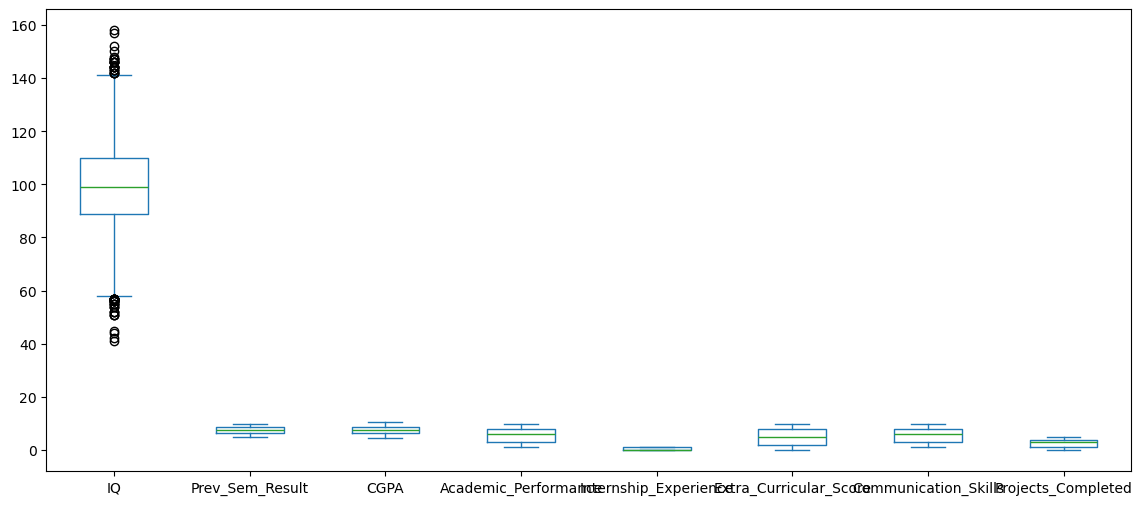

In [6]:
raw_data.plot(kind='box', figsize=(14,6))
plt.show()

In [7]:
def outliers(data, cols: list):
    data = data.copy()
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [8]:
cleaned_data = outliers(raw_data, ['IQ'])

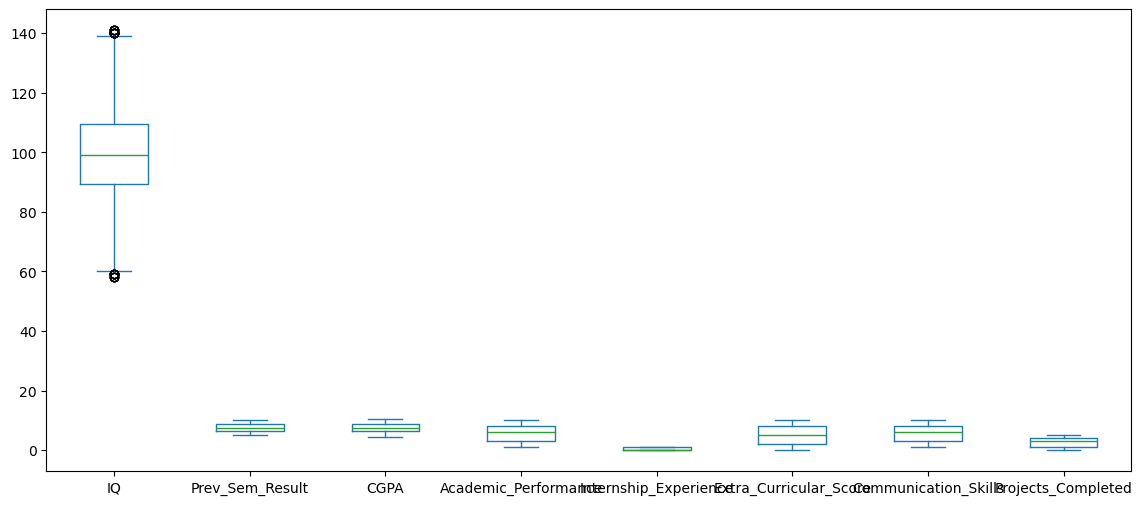

In [9]:
cleaned_data.plot(kind='box', figsize=(14,6))
plt.show()

In [10]:
raw_data.shape[0] - cleaned_data.shape[0]

61

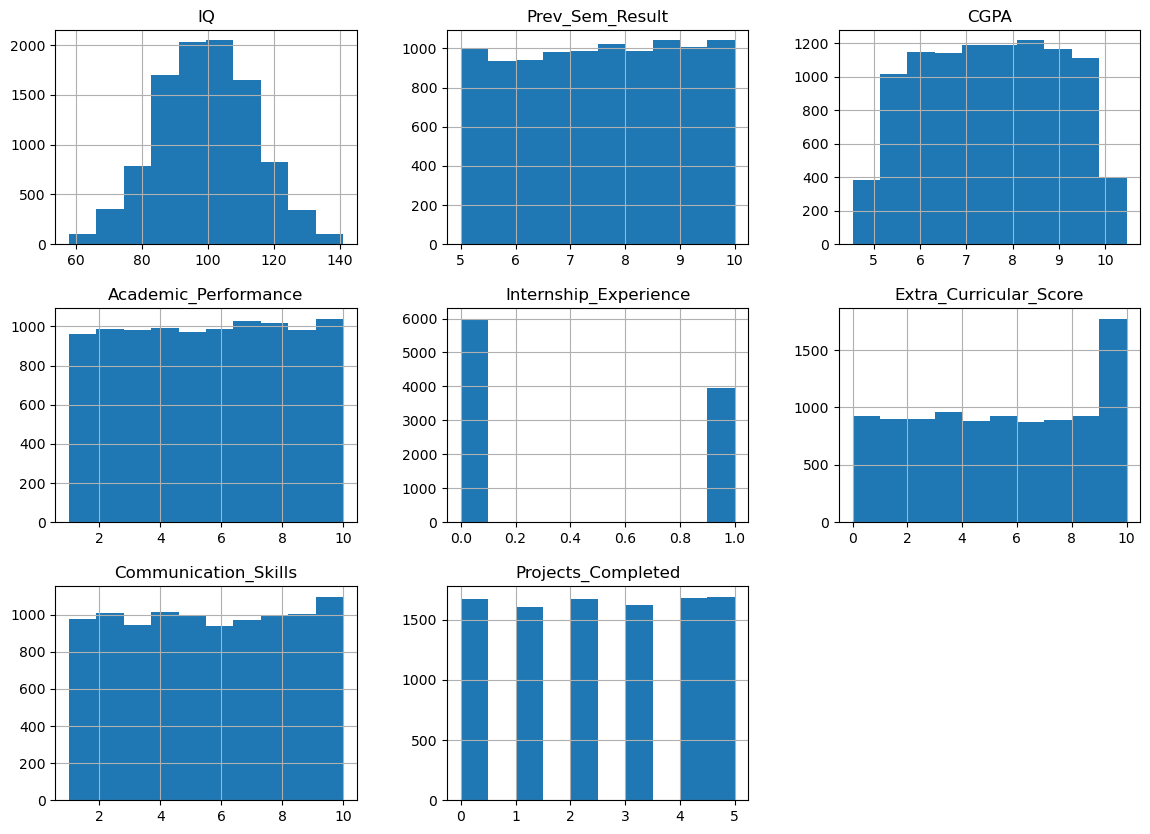

In [11]:
cleaned_data.hist(figsize=(14, 10))
plt.show()

In [12]:
import boto3
import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [13]:
role

'arn:aws:iam::625209709701:role/SageMaker_Execution_Role_AWS'

In [14]:
sagemaker_session = sagemaker.Session()

In [15]:
cleaned_data.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,No
1,97,5.52,5.37,8,0,7,8,0,No
2,109,5.36,5.83,9,0,3,1,1,No
3,122,5.47,5.75,6,1,1,6,1,No
4,96,7.91,7.69,7,0,8,10,2,No


In [16]:
s3_clean_traindata_bucket = "ml-project-demo-zakaria"

In [17]:
cleaned_data.to_csv('cleaned_data.csv', index=False)

In [18]:
s3_path = sagemaker_session.upload_data(
    path='cleaned_data.csv',
    bucket=s3_clean_traindata_bucket,
    key_prefix='training_data'
)

print("Uploaded to:", s3_path)

Uploaded to: s3://ml-project-demo-zakaria/training_data/cleaned_data.csv
